In [60]:
import os
import tarfile
import urllib

In [61]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [62]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

/tmp/ipykernel_5492/2289362660.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [63]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing  = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [65]:
print(housing["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [66]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


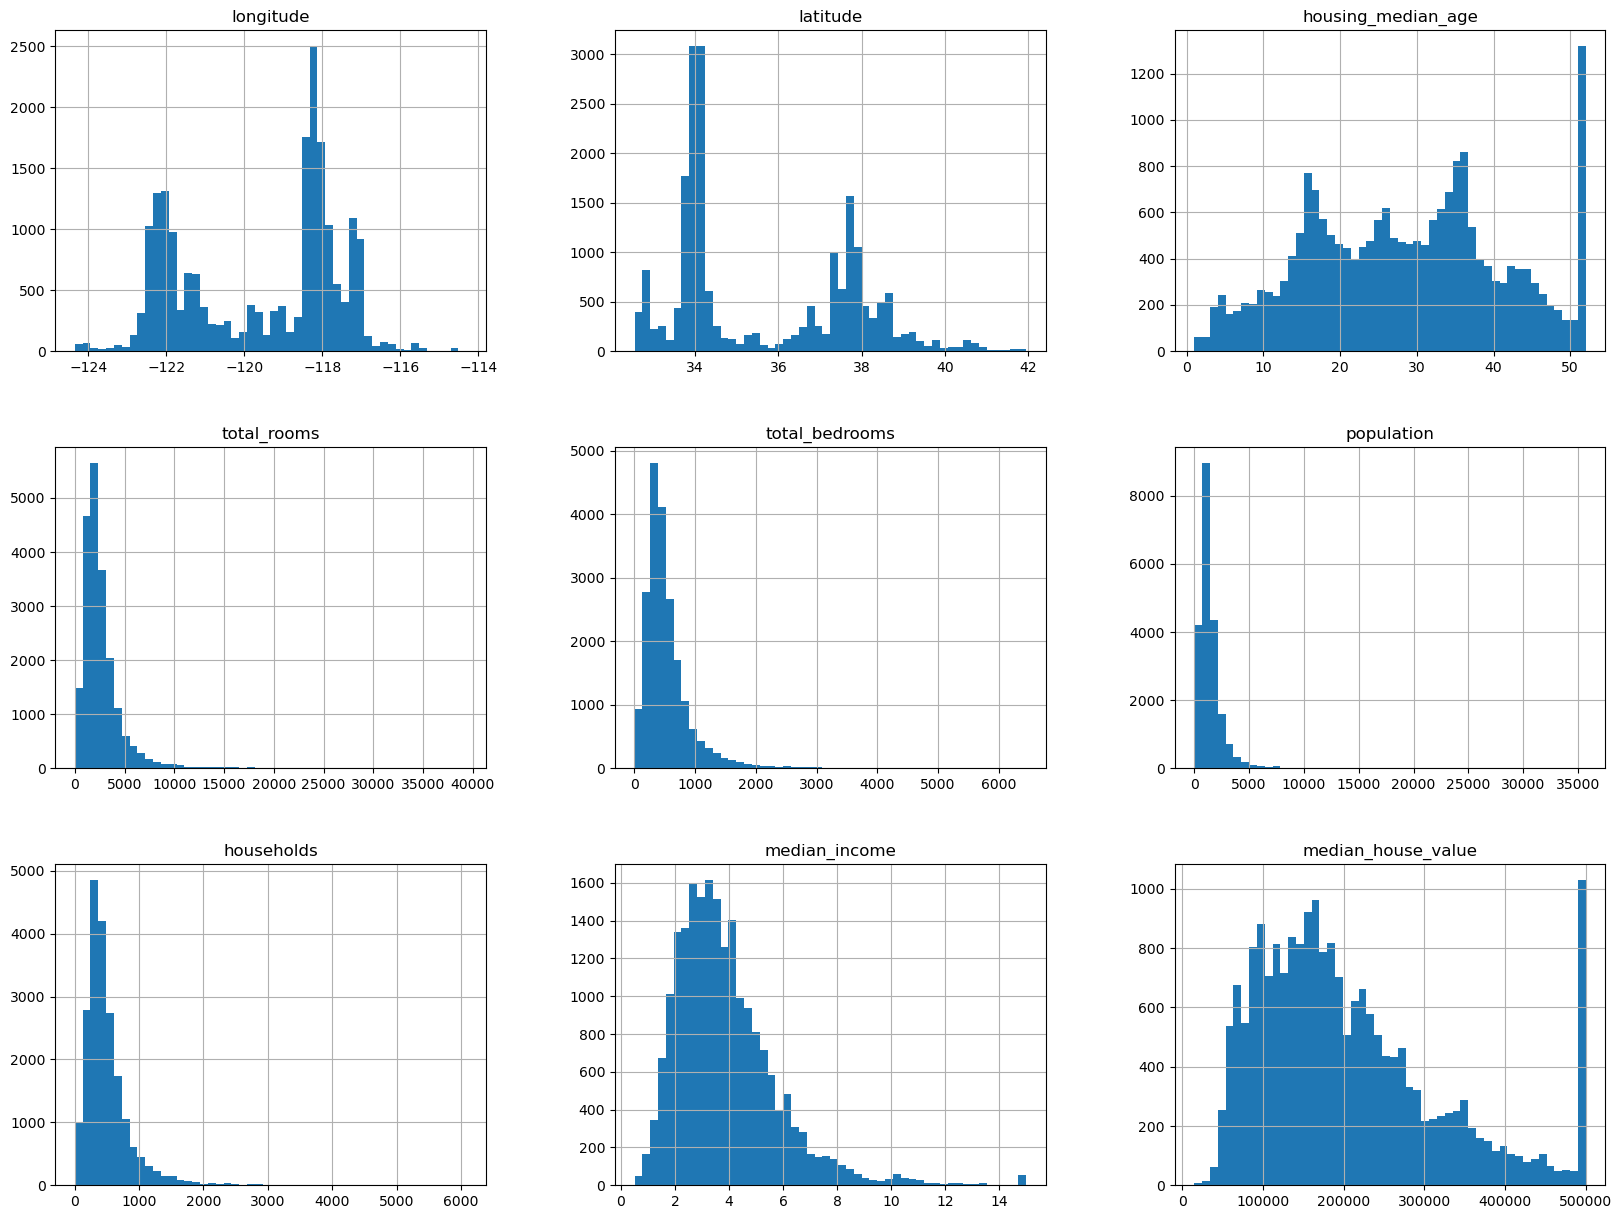

In [67]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

   Age Age Group
0   45     Adult
1   48     Adult
2   65    Senior
3   68    Senior
4   68    Senior


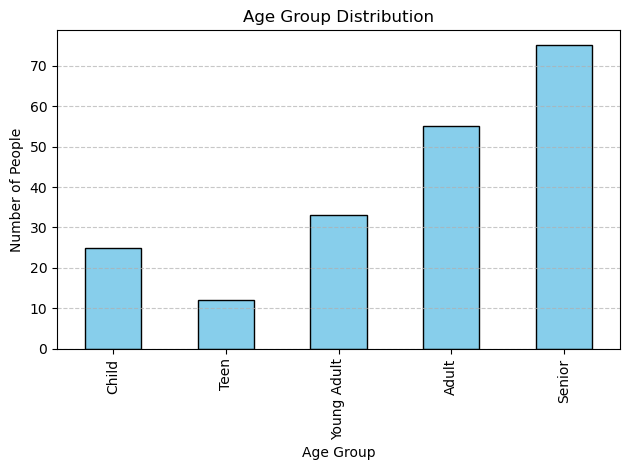

In [70]:
import numpy as np
# Generate more age data
np.random.seed(0)
ages = np.random.randint(1, 100, size=200)  # 200 random ages between 1 and 99

# Define custom age bins and labels
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create a DataFrame
df = pd.DataFrame({'Age': ages})

# Apply cut to categorize the ages
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Show the first few rows
print(df.head())

# Plot a histogram of the age groups
df['Age Group'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [71]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [72]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [73]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [74]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [75]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [76]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [77]:
#This is used to seperate training data and test data
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Example dataset
df = pd.DataFrame({
    'feature': range(100),
    'label': ['A']*80 + ['B']*20  # 90% A, 10% B
})
print(df)

X = df[['feature']]  # features
y = df['label']      # target variable

# Create a stratified splitter
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Use it to split data
for train_index, test_index in splitter.split(X, y):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

# Let's check the proportions
#here we get the same proportiona as test and train data
print("Train label distribution:\n", strat_train['label'].value_counts(normalize=True))
print("Test label distribution:\n", strat_test['label'].value_counts(normalize=True))


    feature label
0         0     A
1         1     A
2         2     A
3         3     A
4         4     A
..      ...   ...
95       95     B
96       96     B
97       97     B
98       98     B
99       99     B

[100 rows x 2 columns]
Train label distribution:
 label
A    0.8
B    0.2
Name: proportion, dtype: float64
Test label distribution:
 label
A    0.8
B    0.2
Name: proportion, dtype: float64


<Axes: >

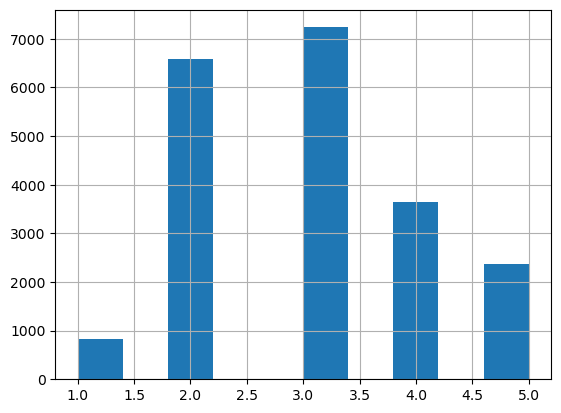

In [78]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [79]:
#these concepts are explained below
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [80]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [81]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [82]:
#this is just an example of cut in pandas
import pandas as pd

ages = pd.Series([22, 35, 62, 45, 28, 55])
bins = [0, 25, 40, 60, 100]
labels = ['Young Adult', 'Adult', 'Middle Aged', 'Senior']
age_groups = pd.cut(ages, bins=bins, labels=labels, right=False)
age_groups

0    Young Adult
1          Adult
2         Senior
3    Middle Aged
4          Adult
5    Middle Aged
dtype: category
Categories (4, object): ['Young Adult' < 'Adult' < 'Middle Aged' < 'Senior']

In [83]:
import pandas as pd

data = [1, 7, 5, 4, 6, 3, 8, 12, 15]
bins = 3  # Number of bins you want

pd.cut(data, bins)


[(0.986, 5.667], (5.667, 10.333], (0.986, 5.667], (0.986, 5.667], (5.667, 10.333], (0.986, 5.667], (5.667, 10.333], (10.333, 15.0], (10.333, 15.0]]
Categories (3, interval[float64, right]): [(0.986, 5.667] < (5.667, 10.333] < (10.333, 15.0]]

<Axes: xlabel='longitude', ylabel='latitude'>

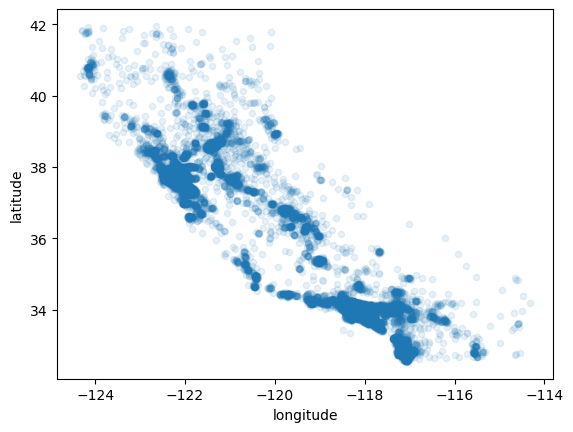

In [84]:
#now lets visualize the complete data
housing = strat_train_set.copy()
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

In [85]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


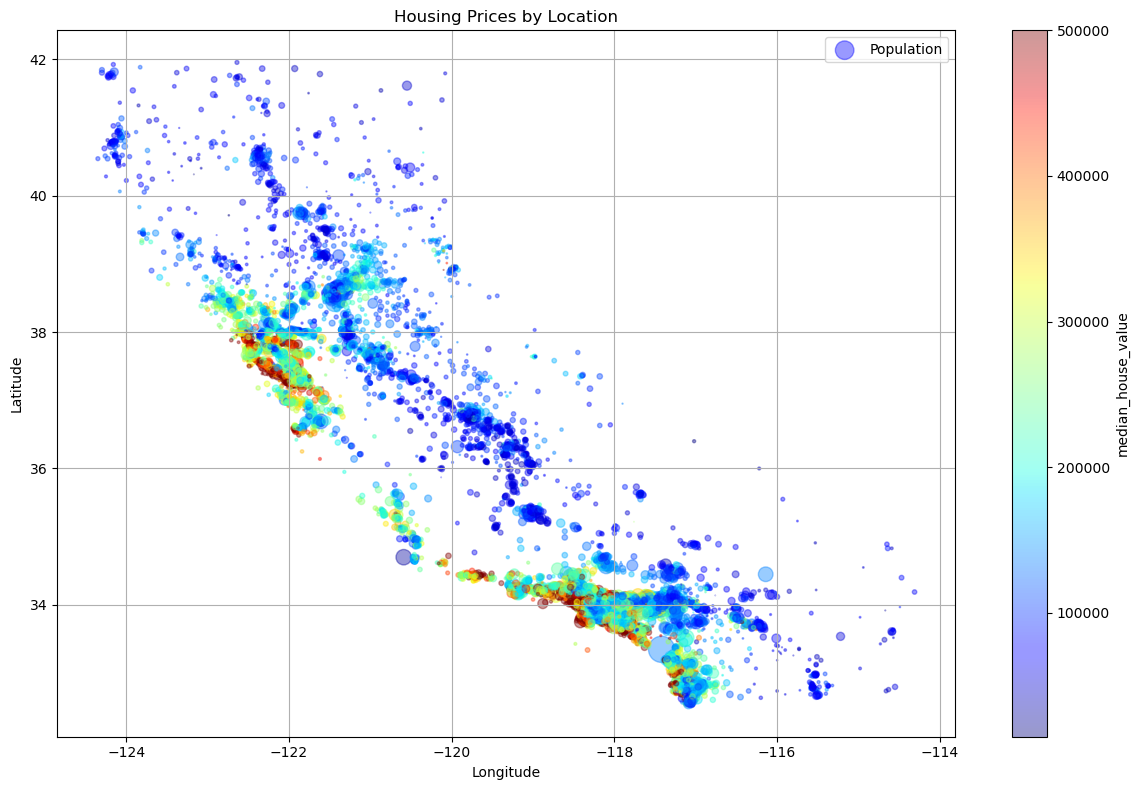

In [86]:
import matplotlib.pyplot as plt
import pandas as pd


# Step 3: Beautiful scatter plot
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,        # bubble size
    label="Population",
    figsize=(12, 8),
    c="median_house_value",               # bubble color
    cmap=plt.get_cmap("jet"),             # color palette
    colorbar=True,
)

plt.title("Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
# Step 1: Only use numeric columns for correlation
corr_matrix = housing.select_dtypes(include=[float, int]).corr()

# Step 2: Sort correlation of all features with median_house_value
print(corr_matrix["median_house_value"].sort_values(ascending=False))
#This return the correlation coefficient

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

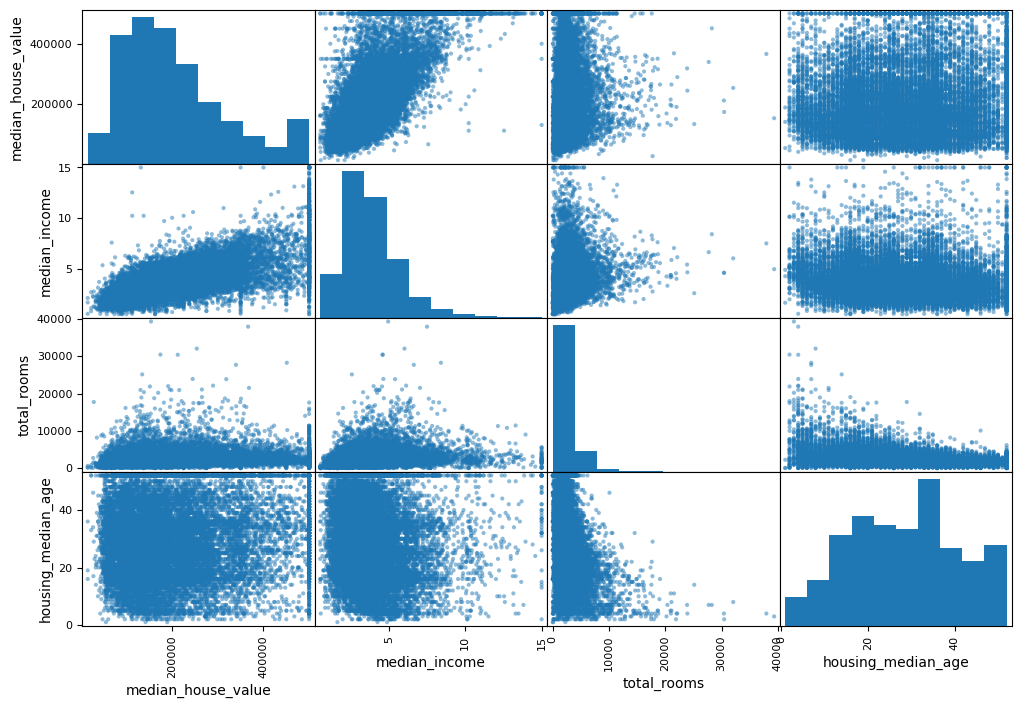

In [88]:
#Another way to check for correlation between attributes is to use the pandas 
#scatter_matrix() function, which plots every numerical attribute against every other numerical attribute.
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

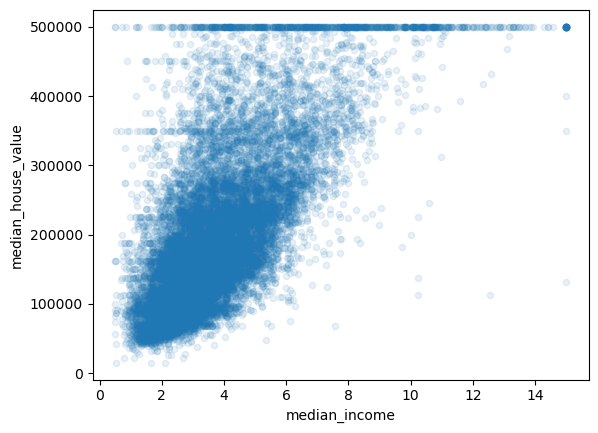

In [89]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [90]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.select_dtypes(include=[int, float]).corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


In [91]:
#now lets feed the data in the ml model
#now lets just clean the data
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [92]:
#there many be many nan values so lets just fill them up
#housing.dropna(subset=["total_bedrooms"])
# option 1 get rid of correcstponding districts
#housing.drop("total_bedrooms", axis=1)
# option 2 fiiling it with the median
#median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)

In [93]:
#we can do the same with scikit learn ie option 3
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [94]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [95]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [96]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [97]:
#Now you can use this “trained” imputer to transform the training set by replacing
#missing values with the learned medians:
X = imputer.transform(housing_num)

In [98]:
#The result is a plain NumPy array containing the transformed features. If you want to
#put it back into a pandas DataFrame, it’s simple:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

In [99]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [100]:
#Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from
#text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [101]:
#You can get the list of categories using the categories_ instance variable
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [102]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Let's extract the ocean_proximity column
housing_cat = housing[["ocean_proximity"]]  # double brackets -> DataFrame, not Series

# Create the encoder object
cat_encoder = OneHotEncoder()

# Fit and transform the data
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# The result is a sparse matrix for memory efficiency
print(housing_cat_1hot)

# If you want to view the full array:
housing_cat_1hot_array = housing_cat_1hot.toarray()
print(housing_cat_1hot_array)

# If you want to see the category names mapped to the columns:
print(cat_encoder.categories_)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np  # Needed for np.c_ to concatenate arrays

# Indexes for the required columns in the housing data
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # Constructor with one optional parameter to control feature addition
    def __init__(self, add_bedrooms_per_room=True):  
        # Store the flag to indicate whether to add the 'bedrooms_per_room' attribute
        self.add_bedrooms_per_room = add_bedrooms_per_room

    # fit() is needed to comply with scikit-learn's API; here, it just returns self
    def fit(self, X, y=None):
        return self  # No fitting necessary for this transformer

    # transform() creates new features based on the input data X
    def transform(self, X):
        # Calculate rooms_per_household: total rooms divided by total households
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]

        # Calculate population_per_household: population divided by households
        population_per_household = X[:, population_ix] / X[:, households_ix]

        # If the flag is set, calculate and add bedrooms_per_room as well
        if self.add_bedrooms_per_room:
            # Calculate bedrooms_per_room: total bedrooms divided by total rooms
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            # Add all three new features to the original data and return
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            # Only add two features if add_bedrooms_per_room is False
            return np.c_[X, rooms_per_household, population_per_household]

# Create an instance of the transformer with 'add_bedrooms_per_room' set to False
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# Apply the transformer to the housing dataset to add new attributes
# 'housing.values' converts the DataFrame to a NumPy array
housing_extra_attribs = attr_adder.transform(housing.values)


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [107]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [108]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [109]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [110]:
#Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error() function:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [111]:
#Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data 
#(Decision Trees are presented in more detail in Chapter 6). The code should look familiar by now:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [113]:
def display_scores(scores):
    print("Scores:", scores)

    print("Mean:", scores.mean())

    print("Standard deviation:", scores.std())

In [114]:
display_scores(tree_rmse_scores)

Scores: [73870.97687031 71154.83360136 69001.5110206  72625.77559381
 69223.40704046 78665.62840198 70573.09491777 72551.67338024
 69567.56237197 71347.33931899]
Mean: 71858.18025174772
Standard deviation: 2724.32476774102


In [117]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [119]:
import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

NameError: name 'my_model' is not defined